### Citations
* Data uploaded and documentation used from Sci-kit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
* Bar graph documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* Bar graph implementation: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [2]:
#Import statements for all libraries I could need to accurately analyze this data
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [43]:
#Import data, create a pandas dataframe of the data, print out a description of the dataset as a whole
X = california_housing.data

df = pd.DataFrame(X, columns=california_housing.feature_names)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In the above code, I create a dataframe and print out a description of the dataset. By creating a dataframe, I can manipluate and transform the data as needed to fully analyze it. By printing out a description of the data, I can see if there is any missing data (there is not), how much data there is, and what each column means. Based on the descriptions of the columns in this dataset, I see no need to drop or modify any columns for ethical reasons.

In [46]:
#Rename target feature to price, a more accurate description of the data which the feature contains
df['Price'] = california_housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In the code above, I rename the 'target' feature to 'price', which is a more accurate description of the data contained in that column. I also looked at the first five rows of data to get basic understanding of the dataset and the type of data each feature contains.

In [35]:
print(df['Price'].describe())
#sum(df['MedInc'] > 15)

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Price, dtype: float64


In the code above, I print a description of the Price feature to determine the best dimensions for the scatterplot. Since the range of the datapoints is only 0-5, I will not set any special parameters around the datapoints contained in the scatterplot.

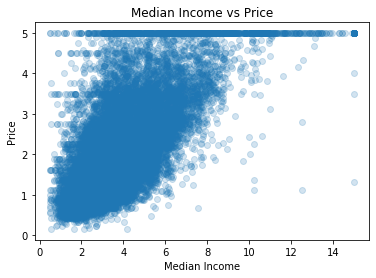

In [54]:
#Basic scatter plot to see visible correlation between median income and median price (target)
plt.title("Median Income vs Price")
plt.xlabel("Median Income")
plt.ylabel("Price")
plt.scatter(df['MedInc'], df['Price'], alpha = 0.2)

I decided to create a scatterplot of Median Income vs Price becuase I thought that there would likely be a strong correlation between median income and the price of the homes on a certain block, as typically people buy residences that fit their means: if they have a high income, they will have an expensive house, and vice versa. I used a low opacity to make it clear which price to median income relationships were most common, as the sheer size of the dataset created many overlapping datapoints that decreased the clarity of the graph.

<Figure size 432x288 with 0 Axes>

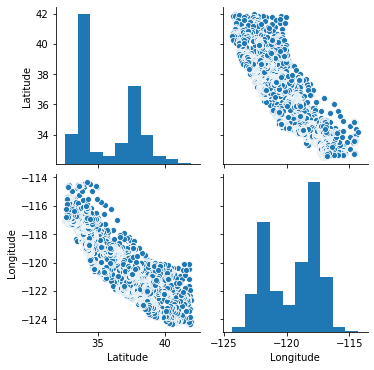

In [49]:
#Pair plot to determine scaling of latitude/longitude data
plt.figure()
sns.pairplot(df, vars=['Latitude', 'Longitude'])
plt.show()

In the above code block, I created a seaborn pairplot of latitude and longitude to check how the data was scaled. I know that if there had been even or no scaling at all, a scatter plot of both groups of data would roughly form the shape of California, which it did. Also, the provided bar graphs gave me insight into the most common latitudes and longitudes, which is important to keep in mind when I compare these datapoints to price, as the more data there is, in theory, the more accurate the prediction.

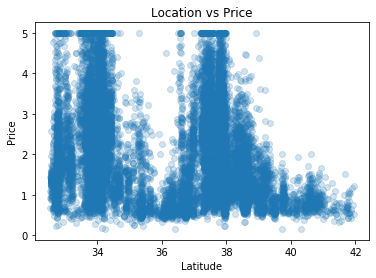

In [51]:
plt.title("Location vs Price")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.scatter(df['Latitude'], df['Price'], alpha = 0.2)

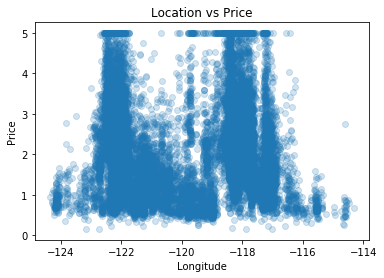

In [80]:
plt.title("Location vs Price")
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.scatter(df['Longitude'], df['Price'], alpha = 0.2)

In the previous two code cells, I created scatter plots showing the relationship between latitude and longitude and price. I did this because I figured that in California, like many places, certain neighborhoods are nicer than others. I figured that how "nice" a neighborhood is can be reflected in the price of a house there, and wanted to see if any certain latitude and longitude pairs had a particularly high price feature, which many of them do. I also wanted to see if any certain latitude and longitude pairs had particularly low price features, which is also the case. The sepcifc circumstances of each neighborhood requires further investigation, but these graphs provide a basic view into the "quality" of a certain neighborhood. This information, along with examinations of other features, such as the average income and racial distribution, can tell a clear story about any given neighborhood.

Text(0.5, 1.0, 'Average Price of Houses Based on Longitude')

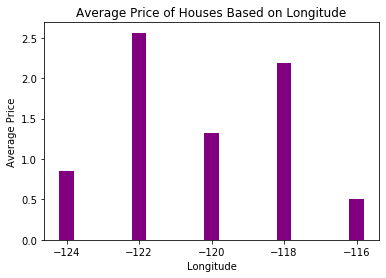

In [99]:
longitude_124 = df['Longitude'] == -124
average_price_124 = sum(df[longitude_124]["Price"]) / sum(df['Longitude'] == -124)
longitude_122 = df['Longitude'] == -122
average_price_122 = sum(df[longitude_122]["Price"]) / sum(df['Longitude'] == -122)
longitude_120 = df['Longitude'] == -120
average_price_120 = sum(df[longitude_120]["Price"]) / sum(df['Longitude'] == -120)
longitude_118 = df['Longitude'] == -118
average_price_118 = sum(df[longitude_118]["Price"]) / sum(df['Longitude'] == -118)
longitude_116 = df['Longitude'] == -116
average_price_116 = sum(df[longitude_116]["Price"]) / sum(df['Longitude'] == -116)

plt.bar([-124, -122, -120, -118, -116], [average_price_124, average_price_122, average_price_120, average_price_118, average_price_116], 
        color ='purple', width = 0.4)
plt.xlabel("Longitude")
plt.ylabel("Average Price")
plt.title("Average Price of Houses Based on Longitude")

In the above cell, I made a bar graph demonstrating the average prices of houses based on Longitude. This graph makes it clear that certain parts of California have houses multiple times more valuable than other areas of California. This demonstrates the housing desparity visible across the US that is becoming a bigger and bigger problem as some live in extreme comfort while the opposite is true for may others.